In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Index(['Date', 'Close', 'MA20'], dtype='object')


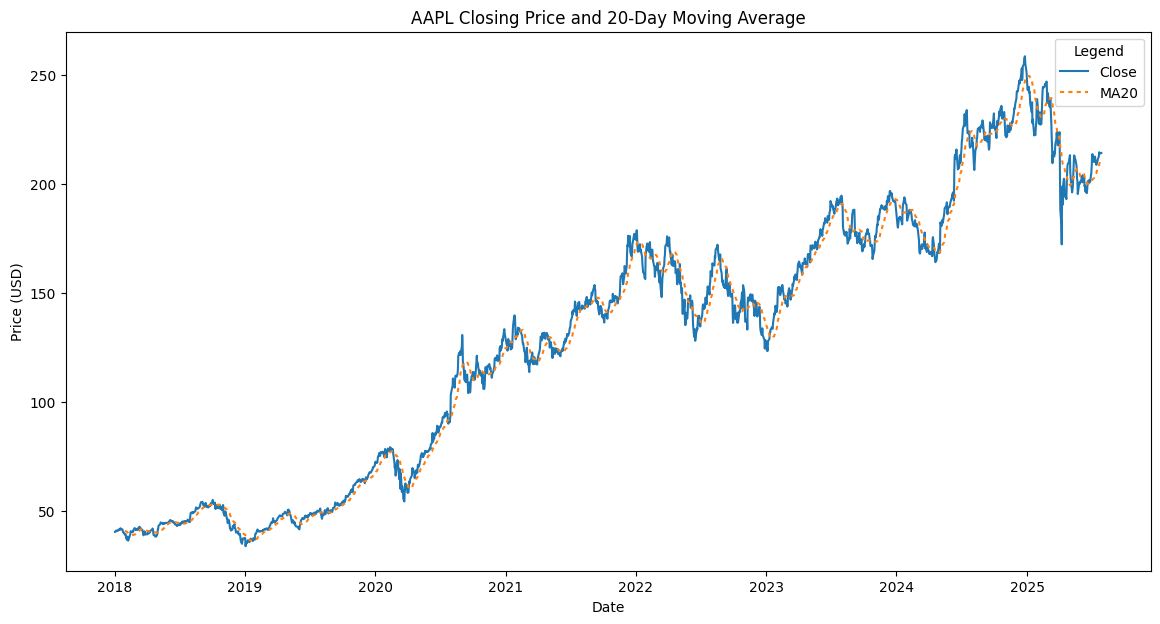

In [15]:
data = pd.read_csv('cleaned_stock_data.csv', header=[0,1], index_col=0, parse_dates=True)

stock = 'AAPL'

df = pd.DataFrame({
    'Close': data[('Close', stock)],
    'MA20': data[('MA20', stock)]
})
df = df.reset_index()
df = df.rename(columns={'index': 'Date'})
print(df.columns)
df_melt = df.melt(id_vars=['Date'], value_vars=['Close', 'MA20'], var_name='Type', value_name='Price')

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_melt, x='Date', y='Price', hue='Type', style='Type', dashes={'Close': '', 'MA20': (2,2)})
plt.title(f'{stock} Closing Price and 20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(title='Legend')
plt.show()



Index(['Date', 'Close', 'MA20'], dtype='object')


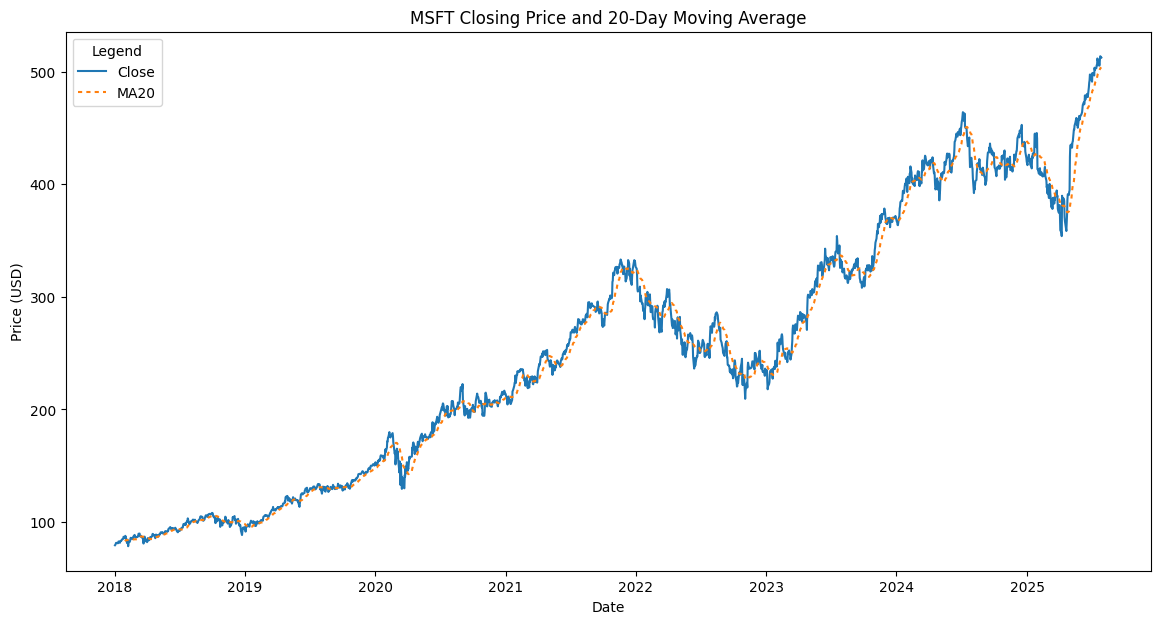

In [16]:
stock = 'MSFT'

df = pd.DataFrame({
    'Close': data[('Close', stock)],
    'MA20': data[('MA20', stock)]
})
df = df.reset_index()
df = df.rename(columns={'index': 'Date'})
print(df.columns)
df_melt = df.melt(id_vars=['Date'], value_vars=['Close', 'MA20'], var_name='Type', value_name='Price')

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_melt, x='Date', y='Price', hue='Type', style='Type', dashes={'Close': '', 'MA20': (2,2)})
plt.title(f'{stock} Closing Price and 20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(title='Legend')
plt.show()

Index(['Date', 'Close', 'MA20'], dtype='object')


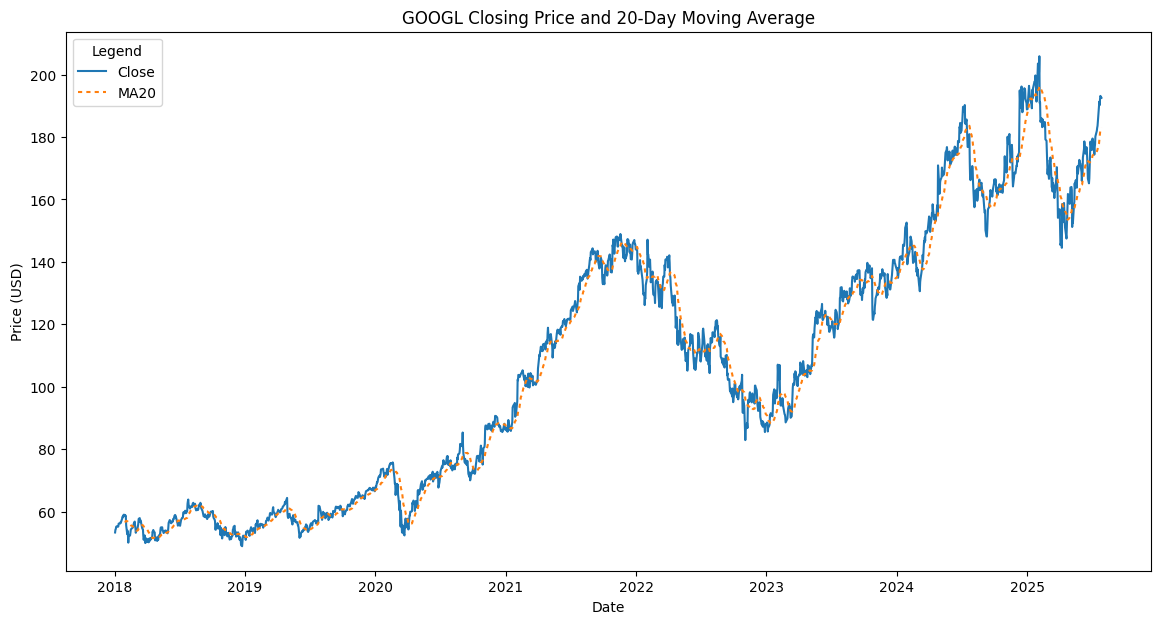

In [17]:
stock = 'GOOGL'

df = pd.DataFrame({
    'Close': data[('Close', stock)],
    'MA20': data[('MA20', stock)]
})
df = df.reset_index()
df = df.rename(columns={'index': 'Date'})
print(df.columns)
df_melt = df.melt(id_vars=['Date'], value_vars=['Close', 'MA20'], var_name='Type', value_name='Price')

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_melt, x='Date', y='Price', hue='Type', style='Type', dashes={'Close': '', 'MA20': (2,2)})
plt.title(f'{stock} Closing Price and 20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(title='Legend')
plt.show()

Index(['Date', 'Close', 'MA20'], dtype='object')


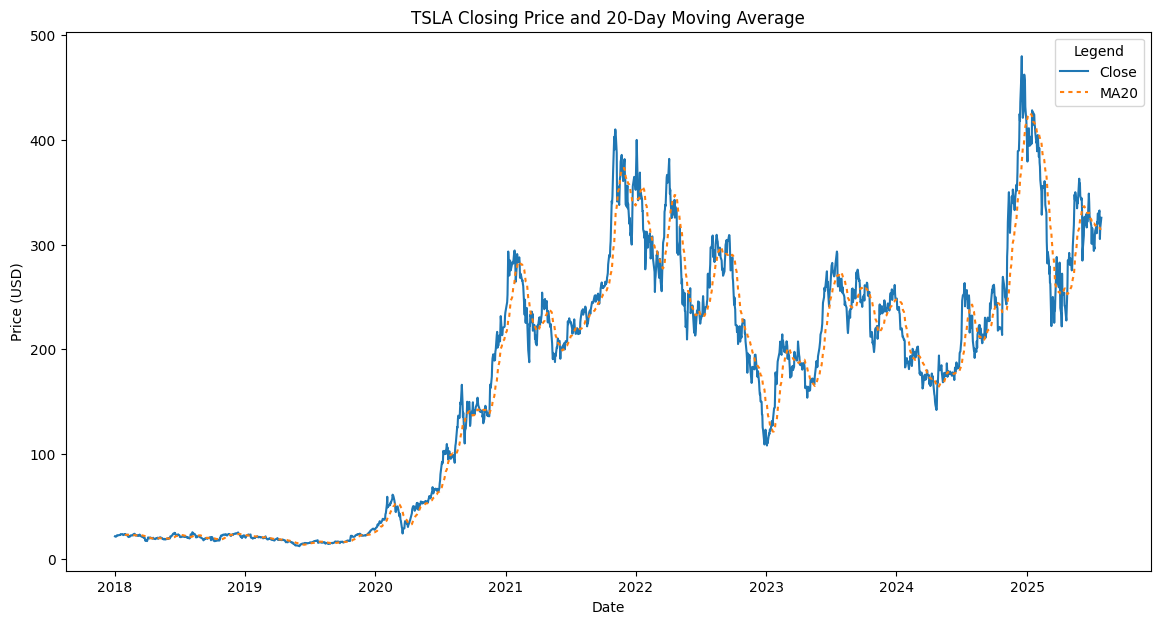

In [18]:
stock = 'TSLA'

df = pd.DataFrame({
    'Close': data[('Close', stock)],
    'MA20': data[('MA20', stock)]
})
df = df.reset_index()
df = df.rename(columns={'index': 'Date'})
print(df.columns)
df_melt = df.melt(id_vars=['Date'], value_vars=['Close', 'MA20'], var_name='Type', value_name='Price')

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_melt, x='Date', y='Price', hue='Type', style='Type', dashes={'Close': '', 'MA20': (2,2)})
plt.title(f'{stock} Closing Price and 20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(title='Legend')
plt.show()

Index(['Date', 'Close', 'MA20'], dtype='object')


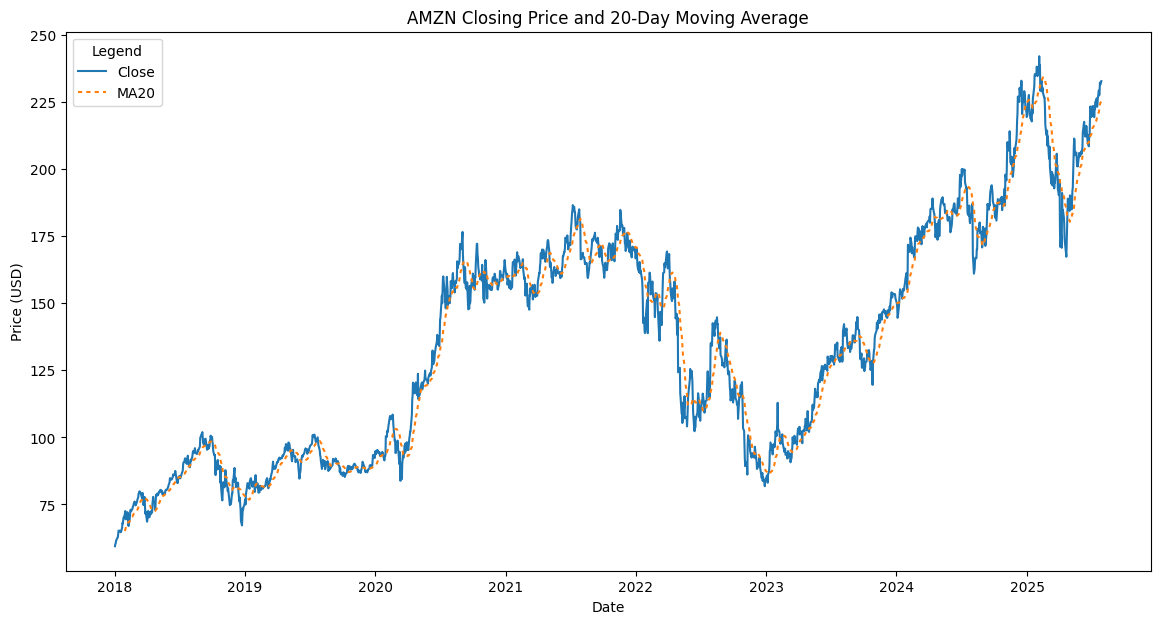

In [19]:
stock = 'AMZN'

df = pd.DataFrame({
    'Close': data[('Close', stock)],
    'MA20': data[('MA20', stock)]
})
df = df.reset_index()
df = df.rename(columns={'index': 'Date'})
print(df.columns)
df_melt = df.melt(id_vars=['Date'], value_vars=['Close', 'MA20'], var_name='Type', value_name='Price')

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_melt, x='Date', y='Price', hue='Type', style='Type', dashes={'Close': '', 'MA20': (2,2)})
plt.title(f'{stock} Closing Price and 20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(title='Legend')
plt.show()

In [20]:
print(data['Close'].describe())

Ticker         AAPL         AMZN        GOOGL         MSFT         TSLA
count   1902.000000  1902.000000  1902.000000  1902.000000  1902.000000
mean     129.042958   135.271252   106.390117   251.266648   169.851314
std       62.210552    43.205342    42.122377   115.466704   116.772779
min       33.870846    59.450500    48.939995    78.460930    11.931333
25%       61.639747    93.778877    62.568629   139.713329    23.868001
50%      139.887550   133.999496   104.080791   245.738411   194.669998
75%      175.307350   168.965748   138.879597   329.879913   253.770000
max      258.396667   242.059998   205.893341   513.710022   479.859985


In [21]:
print(data['Close'].corr())

Ticker      AAPL      AMZN     GOOGL      MSFT      TSLA
Ticker                                                  
AAPL    1.000000  0.820872  0.950479  0.963827  0.883586
AMZN    0.820872  1.000000  0.878553  0.854478  0.789897
GOOGL   0.950479  0.878553  1.000000  0.967952  0.860880
MSFT    0.963827  0.854478  0.967952  1.000000  0.819802
TSLA    0.883586  0.789897  0.860880  0.819802  1.000000


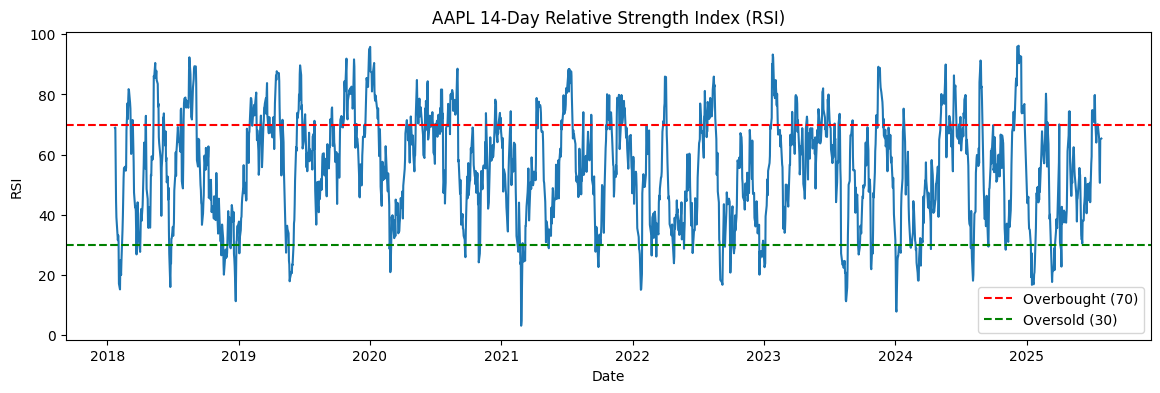

In [44]:
stock_AAPL = 'AAPL'
close = data[('Close', stock_AAPL)]
delta = close.diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
RS = gain / loss
RSI = 100 - (100 / (1 + RS))
plt.figure(figsize=(14, 4))
sns.lineplot(x=close.index, y=RSI)
plt.title(f'{stock_AAPL} 14-Day Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.legend()
plt.show()

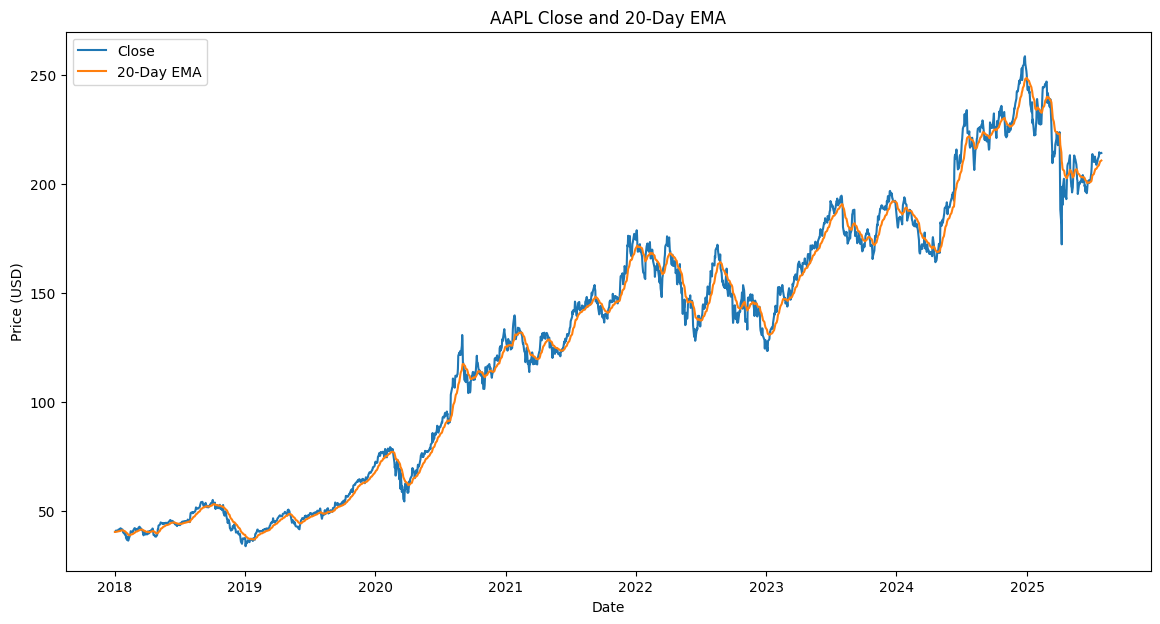

In [40]:
ema_20 = close.ewm(span=20, adjust=False).mean()

plt.figure(figsize=(14, 7))
sns.lineplot(x=close.index, y=close, label='Close')
sns.lineplot(x=close.index, y=ema_20, label='20-Day EMA')
plt.title(f'{stock_AAPL} Close and 20-Day EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


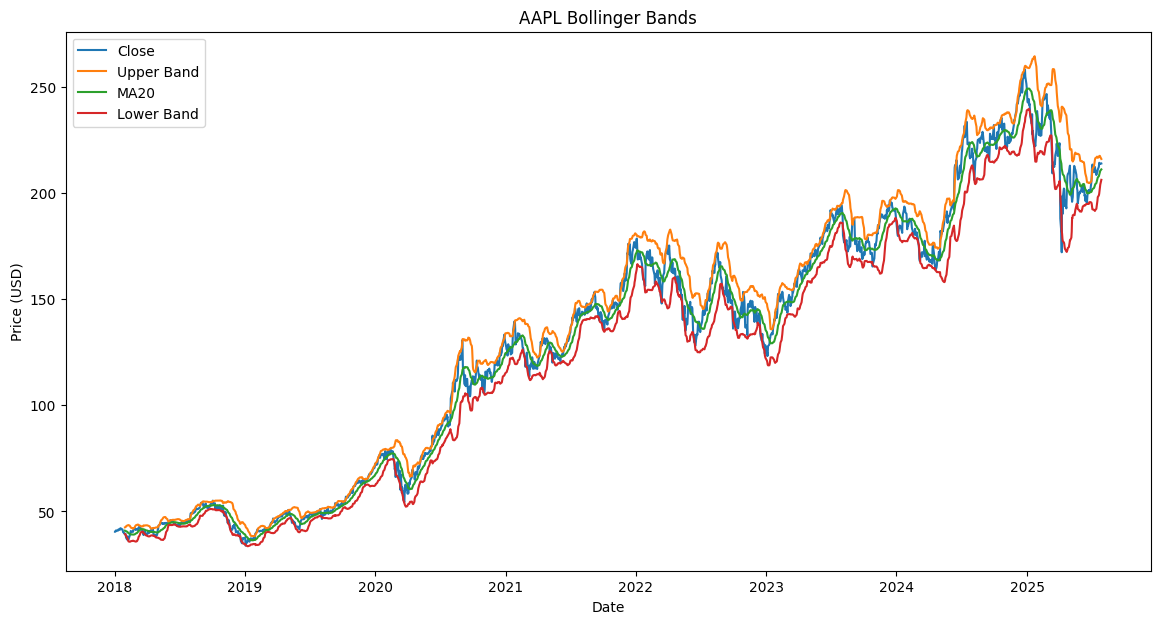

In [41]:
ma_20 = close.rolling(window=20).mean()
std_20 = close.rolling(window=20).std()
upper_band = ma_20 + (2 * std_20)
lower_band = ma_20 - (2 * std_20)

plt.figure(figsize=(14, 7))
sns.lineplot(x=close.index, y=close, label='Close')
sns.lineplot(x=close.index, y=upper_band, label='Upper Band')
sns.lineplot(x=close.index, y=ma_20, label='MA20')
sns.lineplot(x=close.index, y=lower_band, label='Lower Band')
plt.title(f'{stock_AAPL} Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


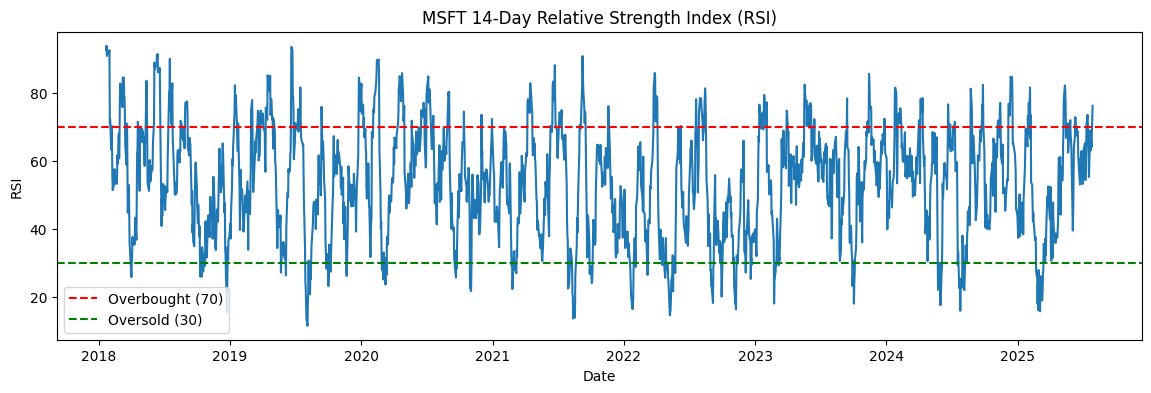

In [43]:
stock_MSFT = 'MSFT'
close = data[('Close', stock)]
delta = close.diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
RS = gain / loss
RSI = 100 - (100 / (1 + RS))
plt.figure(figsize=(14, 4))
sns.lineplot(x=close.index, y=RSI)
plt.title(f'{stock_MSFT} 14-Day Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.legend()
plt.show()

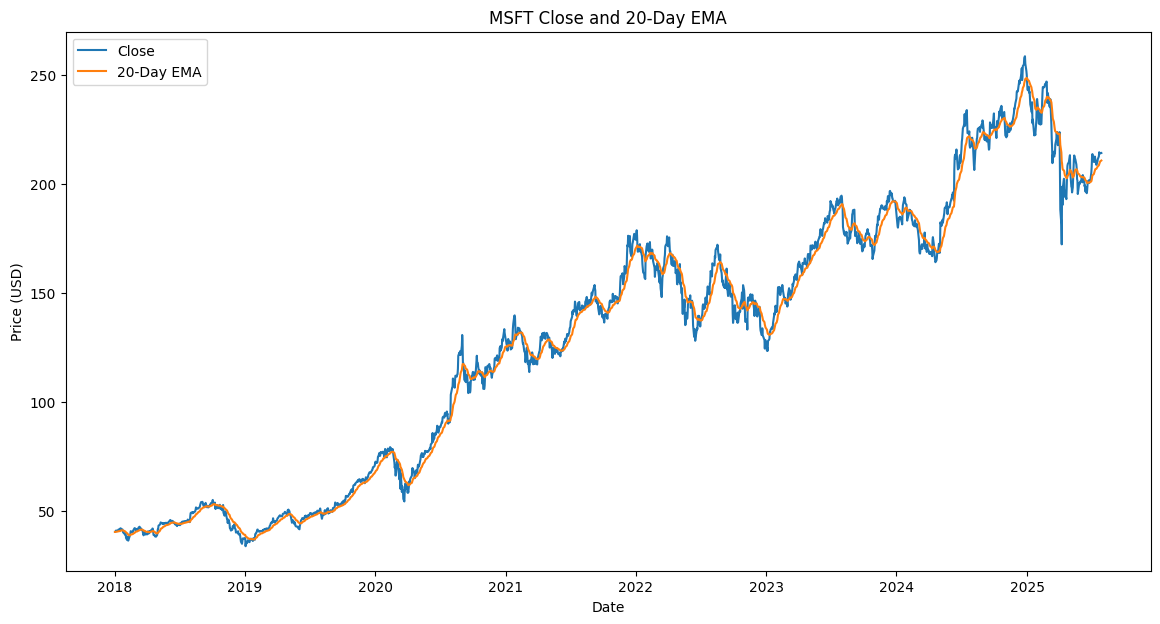

In [45]:
ema_20 = close.ewm(span=20, adjust=False).mean()

plt.figure(figsize=(14, 7))
sns.lineplot(x=close.index, y=close, label='Close')
sns.lineplot(x=close.index, y=ema_20, label='20-Day EMA')
plt.title(f'{stock_MSFT} Close and 20-Day EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


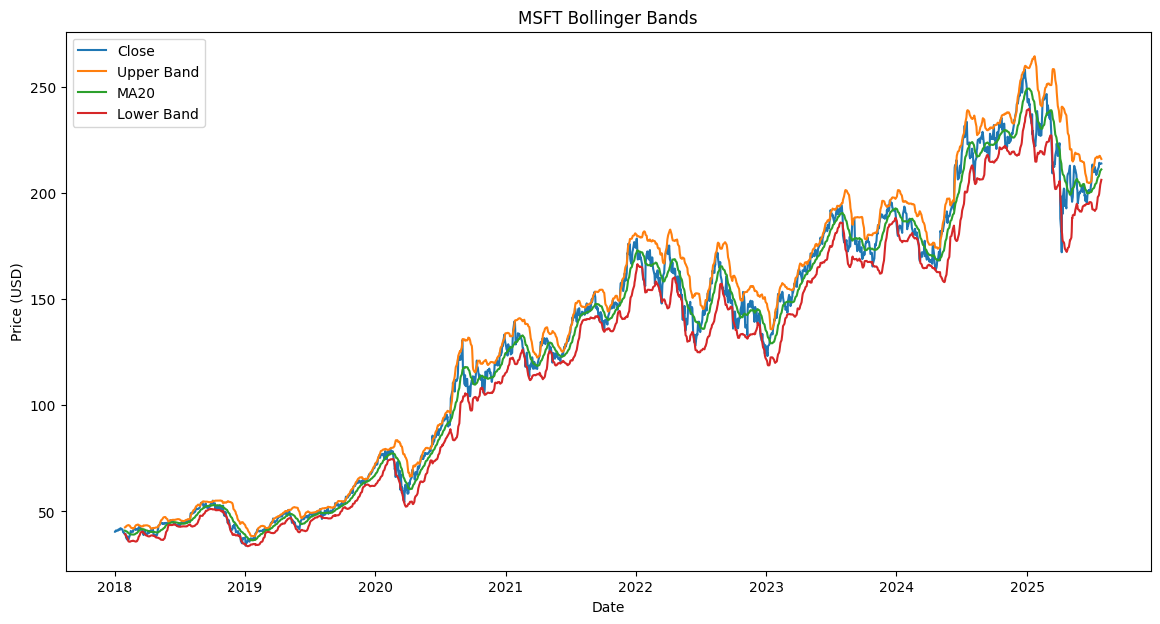

In [46]:
ma_20 = close.rolling(window=20).mean()
std_20 = close.rolling(window=20).std()
upper_band = ma_20 + (2 * std_20)
lower_band = ma_20 - (2 * std_20)

plt.figure(figsize=(14, 7))
sns.lineplot(x=close.index, y=close, label='Close')
sns.lineplot(x=close.index, y=upper_band, label='Upper Band')
sns.lineplot(x=close.index, y=ma_20, label='MA20')
sns.lineplot(x=close.index, y=lower_band, label='Lower Band')
plt.title(f'{stock_MSFT} Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


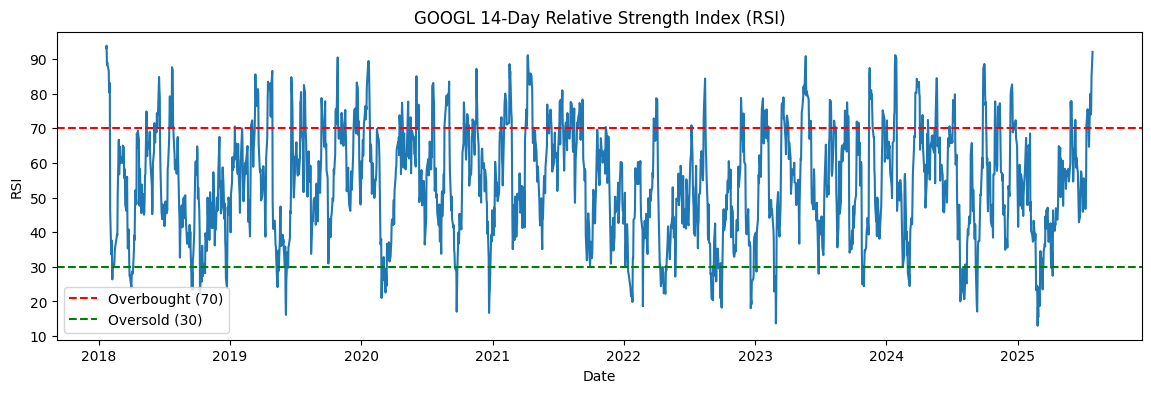

In [57]:
stock_GOOGL = 'GOOGL'
close_GOOGL = data[('Close', stock_GOOGL)]
delta_GOOGL = close_GOOGL.diff()
gain_GOOGL = (delta_GOOGL.where(delta_GOOGL > 0, 0)).rolling(window=14).mean()
loss_GOOGL = (-delta_GOOGL.where(delta_GOOGL < 0, 0)).rolling(window=14).mean()
RS_GOOGL = gain_GOOGL / loss_GOOGL
RSI_GOOGL = 100 - (100 / (1 + RS_GOOGL))
plt.figure(figsize=(14, 4))
sns.lineplot(x=close_GOOGL.index, y=RSI_GOOGL)
plt.title(f'{stock_GOOGL} 14-Day Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.legend()
plt.show()

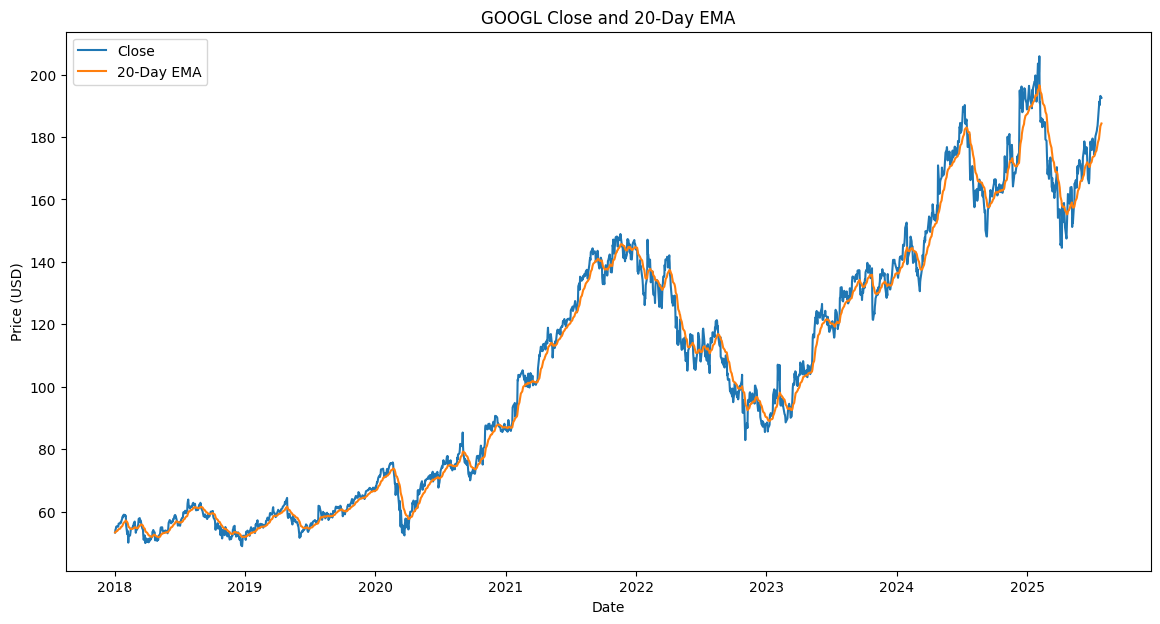

In [54]:
ema_20_GOOGL = close_GOOGL.ewm(span=20, adjust=False).mean()

plt.figure(figsize=(14, 7))
sns.lineplot(x=close_GOOGL.index, y=close_GOOGL, label='Close')
sns.lineplot(x=close_GOOGL.index, y=ema_20_GOOGL, label='20-Day EMA')
plt.title(f'{stock_GOOGL} Close and 20-Day EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


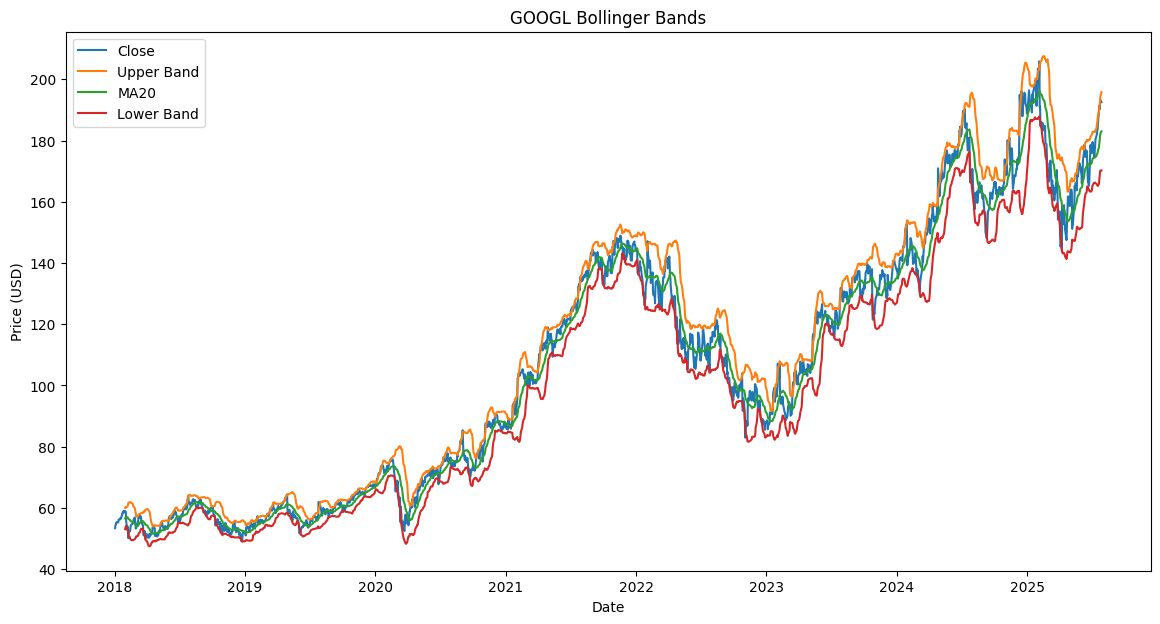

In [62]:
ma_20_GOOGL = close_GOOGL.rolling(window=20).mean()
std_20_GOOGL = close_GOOGL.rolling(window=20).std()
upper_band_GOOGL = ma_20_GOOGL + (2 * std_20_GOOGL)
lower_band_GOOGL = ma_20_GOOGL - (2 * std_20_GOOGL)

plt.figure(figsize=(14, 7))
sns.lineplot(x=close_GOOGL.index, y=close_GOOGL, label='Close')
sns.lineplot(x=close_GOOGL.index, y=upper_band_GOOGL, label='Upper Band')
sns.lineplot(x=close_GOOGL.index, y=ma_20_GOOGL, label='MA20')
sns.lineplot(x=close_GOOGL.index, y=lower_band_GOOGL, label='Lower Band')
plt.title(f'{stock_GOOGL} Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


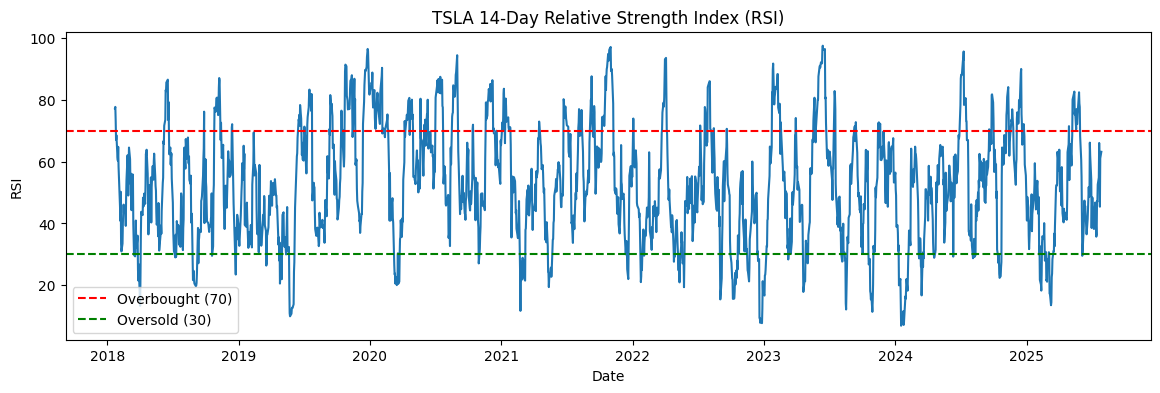

In [58]:
stock_TSLA = 'TSLA'
close_TSLA = data[('Close', stock_TSLA)]
delta_TSLA = close_TSLA.diff()
gain_TSLA = (delta_TSLA.where(delta_TSLA > 0, 0)).rolling(window=14).mean()
loss_TSLA = (-delta_TSLA.where(delta_TSLA < 0, 0)).rolling(window=14).mean()
RS_TSLA = gain_TSLA / loss_TSLA
RSI_TSLA = 100 - (100 / (1 + RS_TSLA))
plt.figure(figsize=(14, 4))
sns.lineplot(x=close_TSLA.index, y=RSI_TSLA)
plt.title(f'{stock_TSLA} 14-Day Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.legend()
plt.show()

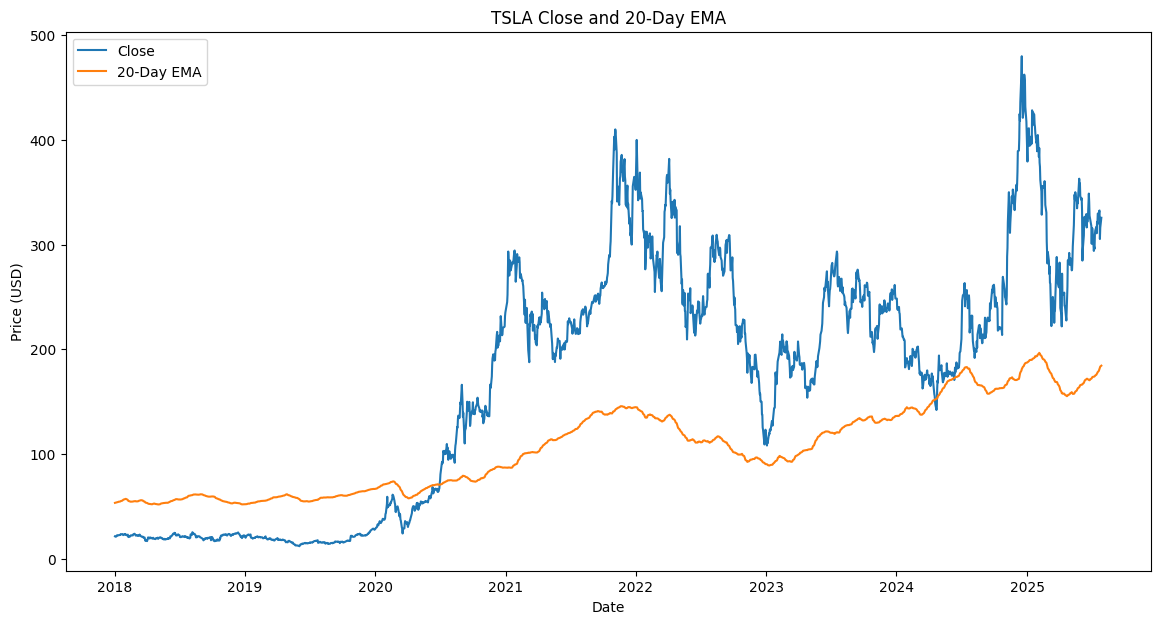

In [59]:
ema_20_TSLA = close.ewm(span=20, adjust=False).mean()

plt.figure(figsize=(14, 7))
sns.lineplot(x=close_TSLA.index, y=close_TSLA, label='Close')
sns.lineplot(x=close_TSLA.index, y=ema_20_TSLA, label='20-Day EMA')
plt.title(f'{stock_TSLA} Close and 20-Day EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


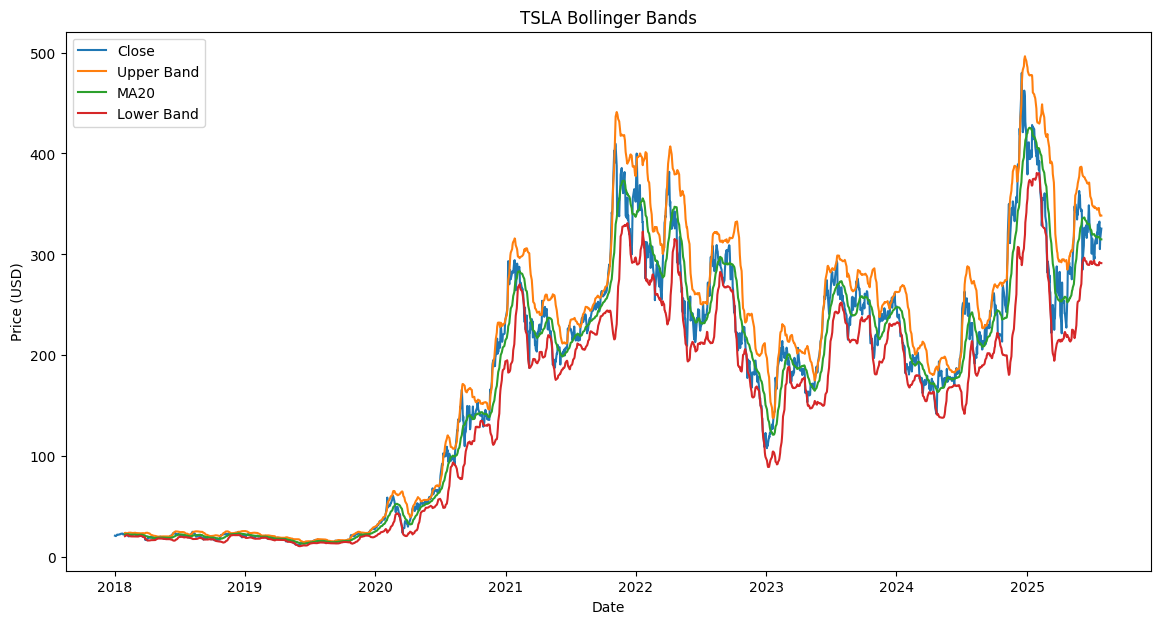

In [61]:
ma_20_TSLA = close_TSLA.rolling(window=20).mean()
std_20_TSLA = close_TSLA.rolling(window=20).std()
upper_band_TSLA = ma_20_TSLA + (2 * std_20_TSLA)
lower_band_TSLA = ma_20_TSLA - (2 * std_20_TSLA)

plt.figure(figsize=(14, 7))
sns.lineplot(x=close_TSLA.index, y=close_TSLA, label='Close')
sns.lineplot(x=close_TSLA.index, y=upper_band_TSLA, label='Upper Band')
sns.lineplot(x=close_TSLA.index, y=ma_20_TSLA, label='MA20')
sns.lineplot(x=close_TSLA.index, y=lower_band_TSLA, label='Lower Band')
plt.title(f'{stock_TSLA} Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


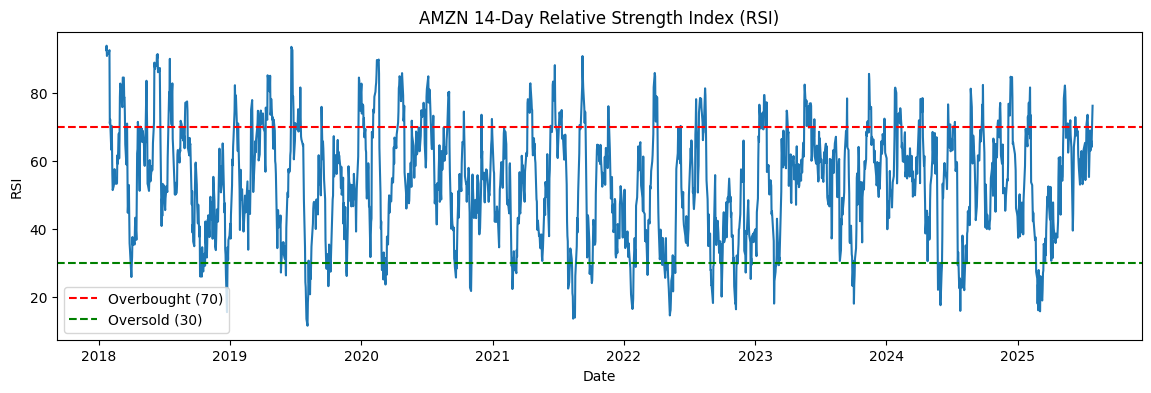

In [37]:
stock = 'AMZN'
close = data[('Close', stock)]
delta = close.diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
RS = gain / loss
RSI = 100 - (100 / (1 + RS))
plt.figure(figsize=(14, 4))
sns.lineplot(x=close.index, y=RSI)
plt.title(f'{stock} 14-Day Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.legend()
plt.show()

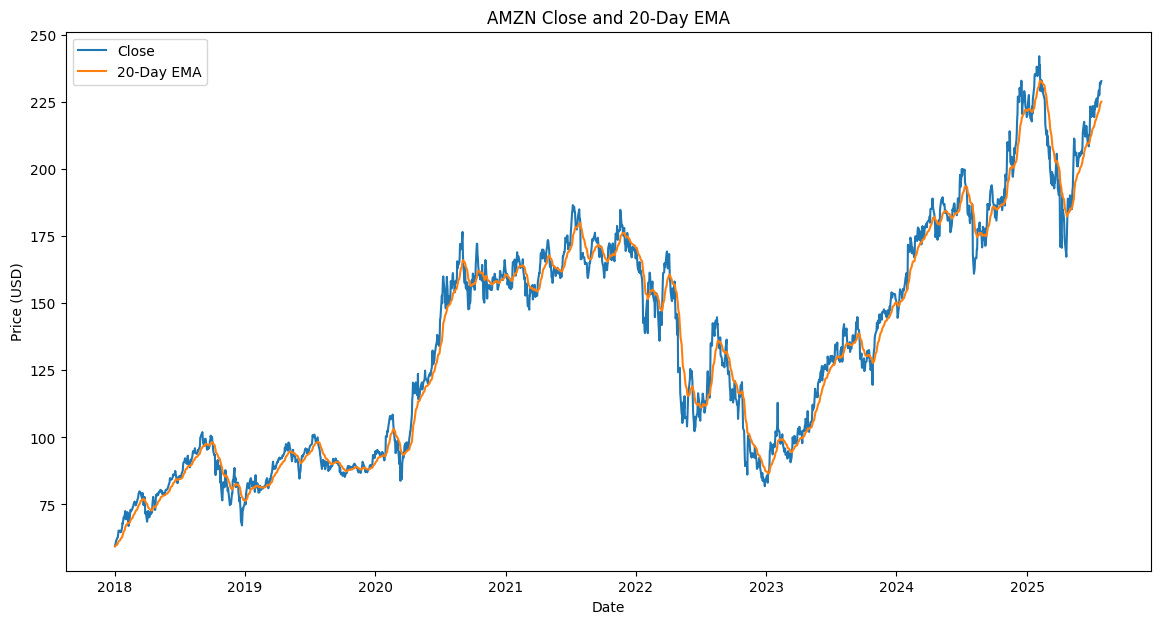

In [38]:
ema_20 = close.ewm(span=20, adjust=False).mean()

plt.figure(figsize=(14, 7))
sns.lineplot(x=close.index, y=close, label='Close')
sns.lineplot(x=close.index, y=ema_20, label='20-Day EMA')
plt.title(f'{stock} Close and 20-Day EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
